In [1]:
import json
import logging

from rdkit import RDLogger
from rdkit.Chem.rdChemReactions import ReactionFromSmarts

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
# Set the logging level for the PIL library to WARNING to suppress DEBUG logs
pil_logger = logging.getLogger('PIL')
pil_logger.setLevel(logging.WARNING)
# Suppress RDKit errors
RDLogger.DisableLog('rdApp.error')

path = '../../syndirella/constants/RXN_SMIRKS_CONSTANTS.json'
with open(path, 'r') as file:
    smirks = json.load(file)

In [2]:
new_rxns = [
    'Chan-Lam_coupling_(amination)',
    'Hantzsch_thiazole_synthesis',
    'Heck_reaction_(intermolecular)',
    'Sonogashira_coupling',
    'Iodo_N-arylation',
    'Alpha_alkylation_of_ester/amide',
    'Alpha_alkylation_of_ester/amide_alcohol',
    'Minisci_reaction_with_carboxylic_acid_(intermolecular)',
    'S-nucleophilic_aromatic_substitution',
    'Amidation-chikv-1',
    'Amidation-chikv-2',
    'Amidation-chikv-3',
    'Amidation-chikv-4'
]

[N;H1,H2:1](-[A])-[a,A].[c:2]-[B](-[O])(-[O])>>[N:1]-[c:2]


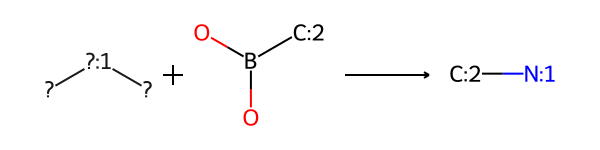

In [3]:
chan_lam = smirks['Chan-Lam_coupling_(amination)']
rxn = ReactionFromSmarts(chan_lam)
print(chan_lam)
rxn

[a,A:1]-[C](=[S:4])-[N&H2].[a,A:3]-[C:5](=[O])-[C;H1:6](-[$([Cl,Br,I]),$(OS(=O)(=O)C),$(OS(=O)(=O)c1ccc(C)cc1)])-[a,A:2]>>[c]-1([a,A:1])-[s:4]-[c:6](-[a,A:2])-[c:5](-[a,A:3])-[n]-1


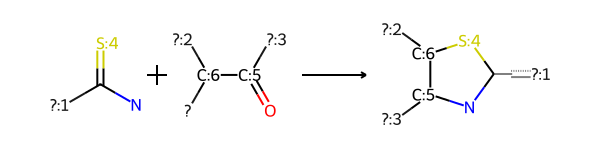

In [4]:
hantz = smirks['Hantzsch_thiazole_synthesis']
rxn = ReactionFromSmarts(hantz)
print(hantz)
rxn

[c,C][C:1]=[C:2].[Br]-[c:3]>>[C:1]=[C:2]-[c:3]


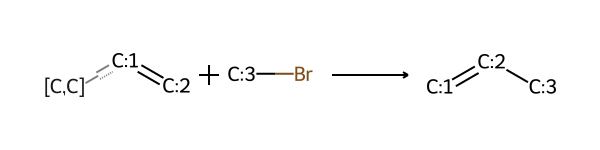

In [5]:
heck = smirks['Heck_reaction_(intermolecular)']
rxn = ReactionFromSmarts(heck)
print(heck)
rxn

[c,C][C:1]=[C:2].[Br]-[c:3]>>[c,C][C:1]=[C:2]-[c:3]


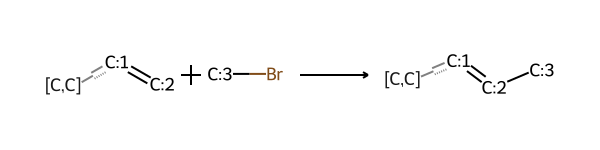

In [6]:
# not quite right, missing carbon
heck = '[c,C][C:1]=[C:2].[Br]-[c:3]>>[c,C][C:1]=[C:2]-[c:3]'
# add to smirks and resave
smirks['Heck_reaction_(intermolecular)'] = heck
with open(path, 'w') as file:
    json.dump(smirks, file, indent=4)
with open(path, 'r') as file:
    smirks = json.load(file)
rxn = ReactionFromSmarts(heck)
print(heck)
rxn

[$([c:1]),$([C:1]=[C:2])]-[Cl,Br,I,F].[C:2]#[C:3]-[c,C:4]>>[c:1]-[C:2]#[C:3]-[c,C:4]


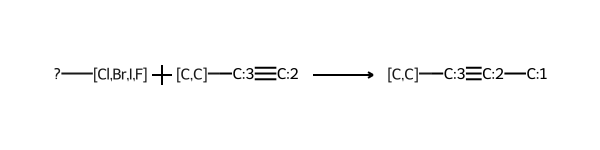

In [7]:
sono = smirks['Sonogashira_coupling']
rxn = ReactionFromSmarts(sono)
print(sono)
rxn

[$([c:1]),$([c,C:1]=[c,C:2])]-[Cl,Br,I,F].[C:4]#[C:5]-[c,C:6]>>[c:1]-[C:4]#[C:5]-[c,C:6]


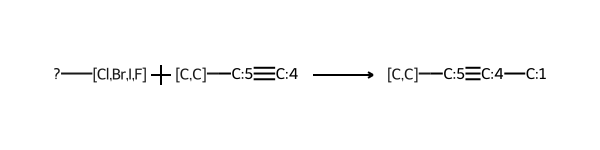

In [8]:
# not right, fixed below
sono = '[$([c:1]),$([c,C:1]=[c,C:2])]-[Cl,Br,I,F].[C:4]#[C:5]-[c,C:6]>>[c:1]-[C:4]#[C:5]-[c,C:6]'

smirks['Sonogashira_coupling'] = sono
with open(path, 'w') as file:
    json.dump(smirks, file, indent=4)
with open(path, 'r') as file:
    smirks = json.load(file)

rxn = ReactionFromSmarts(sono)
print(sono)
rxn

[c:1]-[I].[n,N;R:2]:,-[c,C;R:3]>>[c:1]-[n,N;R:2]:,-[c,C;R:3]


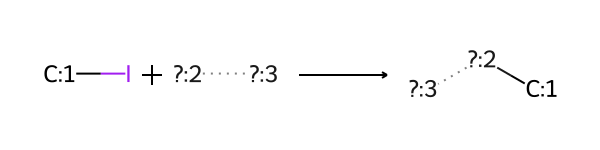

In [9]:
iodo = smirks['Iodo_N-arylation']
rxn = ReactionFromSmarts(iodo)
print(iodo)
rxn
# Can't find examples of this reaction online, need to see exact ones to check if this is correct.

[C;R0:1]-[Cl,Br].[c,C:3][N,O:4]-[c,C:7](=[O:5])-[c,C;R0:6]>>[C:1]-[C:6]-[c:7](=[O:5])-[N,O:4][c,C:3]


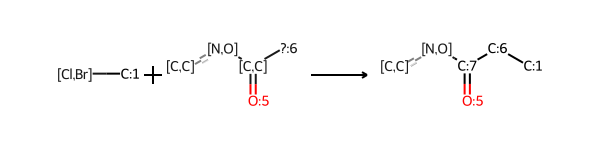

In [10]:
alpha_alkylation = smirks['Alpha_alkylation_of_ester/amide']
rxn = ReactionFromSmarts(alpha_alkylation)
print(alpha_alkylation)
rxn

[C;R0:1]-[O&H1].[c,C:3][N,O:4]-[c,C:7](=[O:5])-[c,C;R0:6]>>[C:1]-[C:6]-[C:7](=[O:5])-[N,O:4][c,C:3]


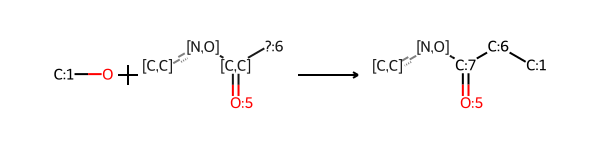

In [11]:
alpha_alkylation_alc = smirks['Alpha_alkylation_of_ester/amide_alcohol']
rxn = ReactionFromSmarts(alpha_alkylation_alc)
print(alpha_alkylation_alc)
rxn

[C:1]-[C](=[O])-[OH].[n]:[c:2]>>[C:1]-[c:2]:[n]


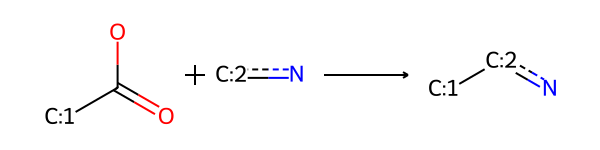

In [12]:
minisci = smirks['Minisci_reaction_with_carboxylic_acid_(intermolecular)']
rxn = ReactionFromSmarts(minisci)
print(minisci)
rxn

[c:1]-[F,Cl,Br,I].[SH:2]-[A:3]>>[c:1]-[S:2]-[A:3]


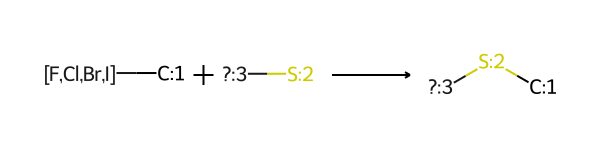

In [13]:
s_nucleophillic = smirks['S-nucleophilic_aromatic_substitution']
rxn = ReactionFromSmarts(s_nucleophillic)
print(s_nucleophillic)
rxn

[c,C:1]-[F,Cl,Br,I].[SH:2]-[A:3]>>[c,C:1]-[S:2]-[A:3]


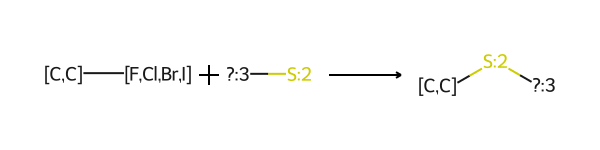

In [14]:
# not quite right, fixed below
s_nucleophillic = '[c,C:1]-[F,Cl,Br,I].[SH:2]-[A:3]>>[c,C:1]-[S:2]-[A:3]'

smirks['S-nucleophilic_aromatic_substitution'] = s_nucleophillic
with open(path, 'w') as file:
    json.dump(smirks, file, indent=4)
with open(path, 'r') as file:
    smirks = json.load(file)

rxn = ReactionFromSmarts(s_nucleophillic)
print(s_nucleophillic)
rxn

[O][C:1](=O)[cX3]1[nX2][c&H1X3][nX2][cX3]2[n&H1X3][c&H1X3][c&H1X3][cX3]12.[N&H2:2]Cc1ccccc1>>[N&H1:2](Cc1ccccc1)-[C:1](=O)[cX3]1[nX2][c&H1X3][nX2][cX3]2[n&H1X3][c&H1X3][c&H1X3][cX3]12


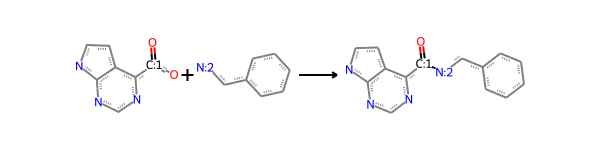

In [15]:
amid1 = smirks['Amidation-chikv-1']
rxn = ReactionFromSmarts(amid1)
print(amid1)
rxn

[O][C:1](=O)[cX3]1[c&H1X3][c&H1X3][nX2][cX3]2[n&H1X3][c&H1X3][c&H1X3][cX3]12.[N&H2:2]Cc1ccccc1>>[N&H1:2](Cc1ccccc1)-[C:1](=O)[cX3]1[c&H1X3][c&H1X3][nX2][cX3]2[n&H1X3][c&H1X3][c&H1X3][cX3]12


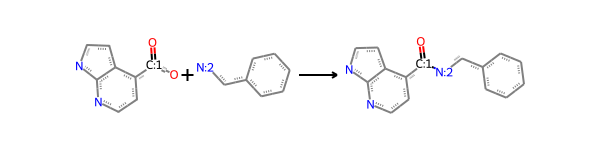

In [16]:
amid2 = smirks['Amidation-chikv-2']
rxn = ReactionFromSmarts(amid2)
print(amid2)
rxn

[C&H3X4][CX4]([C&H3X4])([C&H3X4])OC(=O)N[cX3]1[nX2][c&H1X3][c&H1X3][cX3]([nX2]1)[C:1](O)=O.[N&H2:2]Cc1ccccc1>>[C&H3X4][CX4]([C&H3X4])([C&H3X4])OC(=O)N[cX3]1[nX2][c&H1X3][c&H1X3][cX3]([nX2]1)[C:1](=O)[N&H2:2]Cc1ccccc1


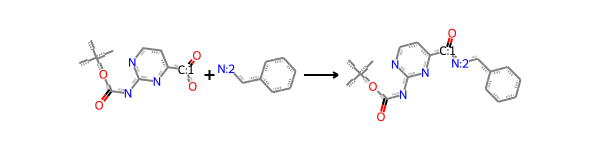

In [17]:
amid3 = smirks['Amidation-chikv-3']
rxn = ReactionFromSmarts(amid3)
print(amid3)
rxn

[C&H3X4][CX4]([C&H3X4])([C&H3X4])OC(=O)N[cX3]1[nX2][c&H1X3][c&H1X3][cX3]([c&H1X3]1)[C:1](O)=O.[N&H2:2]Cc1ccccc1>>[C&H3X4][CX4]([C&H3X4])([C&H3X4])OC(=O)N[cX3]1[nX2][c&H1X3][c&H1X3][cX3]([c&H1X3]1)[C:1](=O)[N&H2:2]Cc1ccccc1


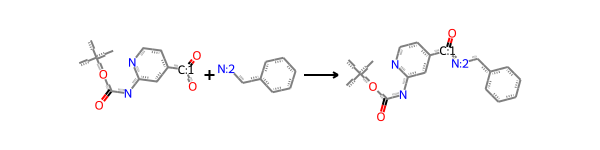

In [18]:
amid4 = smirks['Amidation-chikv-4']
rxn = ReactionFromSmarts(amid4)
print(amid4)
rxn